# Prosta Regresja Liniowa

## Definicja

Regresja liniowa to metoda **przewidywania wartości** szukanej zmiennej *y* (zwanej zmienną zależną lub objaśnianą) przy znanych wartościach innych zmiennych _x_ (zwanych niezależnymi lub objaśniającymi).

Metoda ta zakłada, że zależność między zmienną objaśniającą a objaśnianą jest **zależnością liniową**, dlatego funkcja regresji liniowej przyjmuje postać **funkcji liniowej**:

$$ y = bx + a $$

Analiza regresji liniowej ma na celu wyliczenie takich współczynników **b (ang. slope) i a (ang. intercept)**, aby funkcja **najlepiej przewidywała zmienną objaśnianą**. Linia będąca wynikiem tej funkcji nazywa się __linią najlepiej pasującą__ (ang. best-fitting line) i jest **modelem regresji liniowej**.







## Objaśnienie
Dane mamy przykładowe zbiory X i Y:

$$ X = \left \{  1,2,3,4,5 \right \} $$
$$ Y = \left \{  4, 6, 9, 11, 18 \right \} $$

Zapiszmy to w Pythonie:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]
df

,X,Y
0,1,4
1,2,6
2,3,9
3,4,11
4,5,18


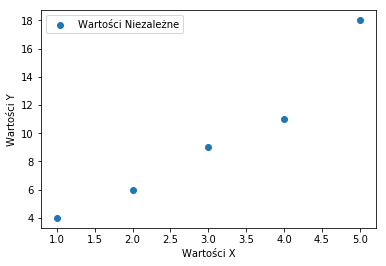

In [2]:
plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

Aby wyznaczyć najlepiej pasującą linię, musimy obliczyć współczynniki b i a. Jednak zanim to zrobimy musimy przygotować sobie pare zmiennych: 

* **Średnie zbiorów X i Y** (Mx, My)
* **Odchylenie standardowe (z próby) zbiorów X i Y** (Sx, Sy)
* **Współczynnik korelacji (Pearsona) zbiorów X i Y** (r)

### Obliczanie średniej arytmetycznej
Średnia arytmetyczna zbioru to suma wszystkich jego elementów podzielona przez ich ilość. Określa **średnią wartość elementów danego zbioru**. Opisuje ją wzór:

$$ M_{A} = \frac{a_{1} + a_{2} + ... + a_{n}}{n} $$

Więc średnie zbiorów X i Y możemy obliczyć tak:

$$Mx = \frac{1 + 2 + 3 + 4 + 5}{5} = \frac{15}{5} = 3$$

$$My = \frac{4, 6, 9, 11, 18}{5} = \frac{48}{5} = 9.6$$

.. a tak to wygląda w Pythonie:

In [3]:
def srednia(zbior):
    return float(zbior.sum()) / len(zbior)

Mx = srednia(df['X'])
My = srednia(df['Y'])

print("Mx: ", Mx)
print("My: ", My)


Mx:  3.0
My:  9.6


### Obliczanie odchylenia standardowego z próby
Odchylenie standardowe to jedna z miar zmienności zbioru. **Służy ono do estymowania o ile średnio elementy zbioru różnią się od średniej tego zbioru**. Obliczamy je za pomocą poniższego wzoru:

$$ s_{A} = \sqrt{\frac{(a_{1} - M_{A})^{2}  + (a_{2} - M_{A})^{2}  + ... + (a_{n} - M_{A})^{2} }{n - 1}} $$

Powyższy wzór jest skomplikowany, ale bardzo łatwy do zaimplementowania, gdy znamy już średnią zbioru!
Odchylenie standardowe policzymy tak:

$$ s_{X} = \sqrt{\frac{(1 - 3)^{2}  + (2 - 3)^{2}  + (3 - 3)^{2}  + (4 - 3)^{2}  + (5 - 3)^{2} }{5 - 1}} = \sqrt{\frac{10}{4}} \approx 1.58$$

$$ s_{Y} = \sqrt{\frac{(4 - 9.6)^{2}  + (6 - 9.6)^{2}  + (9 - 9.6)^{2}  + (11 - 9.6)^{2}  + (18 - 9.6)^{2} }{5 - 1}} = \sqrt{\frac{117.2}{4}} \approx 5.41 $$

In [4]:
from math import sqrt

def odchylenie(zbior, srednia):
    licznik = 0
    for elem in zbior:
        licznik += (elem - srednia) * (elem - srednia)
    return sqrt(licznik / (len(zbior) - 1))

Sx = odchylenie(df['X'], Mx)
Sy = odchylenie(df['Y'], My)

print("Sx: ", Sx)
print("Sy: ", Sy)
    

Sx:  1.5811388300841898
Sy:  5.412947441089743


### Obliczanie współczynnika korelacji Pearsona
Współczynnik korelacji liniowej Pearsona **służy do określenia związku liczb z dwóch zbiorów**.
Może przyjmować warotści od -1 do 1. Jeśli:

* Współczynnik korelacji jest **większy od 0**, to znaczy, że między elementami danych zbiorów istnieje __korelacja dodatnia__. Oznacza to, że wraz ze wzrostem wartości elementów pierwszego zbioru, rosną wartości elementów drugiego zbioru. Korelacja ta jest silniejsza, gdy współczynnik ma wartość bliższą **1**.


* Współczynnik korelacji jest **mniejszy od 0**, to znaczy, że między elementami danych zbiorów istnieje __korelacja ujemna__. Oznacza to, że wraz ze wzrostem wartości elementów pierwszego zbioru, maleją wartości elementów drugiego zbioru. Korelacja ta jest silniejsza, gdy współczynnik ma wartość bliższą **-1**.


* Współczynnik korelacji jest **równy 0**, to znaczy, że między elementami danych zbiorów __nie ma korelacji__.

W skrócie:

* r > 0 - korelacja dodatnia

* r < 0 - korelacja ujemna

* r = 0 - brak korelacji


Współczynnik korelacji liniowej Pearsona opisuje wzór:

$$ r_{XY}=\frac{n \times ( x_{1}y_{1} + x_{2}y_{2} +  ... + x_{n}y_{n})  - (x_{0} + x_{1} + ... + x_{n}) \times (y_{0} + y_{1} + ... + y_{n})  } {\sqrt{[n \times (x_{0}^{2} + x_{1}^{2} + ... + x_{n}^{2}) - (x_{0} + x_{1} + ... + x_{n})^{2}] \times [n \times (y_{0}^{2} + y_{1}^{2} + ... + y_{n}^{2}) - (y_{0} + y_{1} + ... + y_{n})^{2}]}} $$

Wow.. Wygląda okropnie. Na szczęście to tylko zapis. Obliczenie tego jest znowu zaskakująco proste! Zanim jednak to zrobimy musimy rozszerzyć naszą tabelę i obliczyć w niej nowe dane:

1. Iloczyn każdych dwóch odpowiadających elementów zbioru X i Y (xy)
2. Kwadrat każdego elementu ze zbioru X (x2)
3. Kwadrat każdego elementu ze zbioru Y (y2)
4. Sumy wszystkich elementów i wyżej wymienionych wartości dla każdego zbioru (Σ)
5. Ilość elementów w zbiorach (n)

Obliczmy więc te wartości w Pythonie:

In [15]:
n = len(df['X'])
vr = pd.DataFrame(df[:])
vr['y2'] = df['Y'] * df['Y']
vr['xy'] = df['X'] * df['Y']
vr['x2'] = df['X'] * df['X']
vr['y2'] = df['Y'] * df['Y']
vr.loc['Σ'] = vr.sum()

print("n = ", n)
print()
print(vr)

n =  7



,X,Y,y2,xy,x2
0,1.0,4.00000,16.000000,4.00000,1.0
1,2.0,6.00000,36.000000,12.00000,4.0
2,3.0,9.00000,81.000000,27.00000,9.0
3,4.0,11.00000,121.000000,44.00000,16.0
4,5.0,18.00000,324.000000,90.00000,25.0
5,6.0,19.50000,380.250000,117.00000,36.0
6,20.0,66.11248,4370.860076,1322.24961,400.0
Σ,41.0,133.61248,5329.110076,1616.24961,491.0


Teraz, jak już znamy potrzebne wartości, możemy znacznie uprościć nasz wzór:

$$ r_{XY}=\frac{n \times \sum x_{i} y_{i} - \sum x_{i} \times \sum y_{i}}{\sqrt{[n \times \sum x_{i}^{2} - (\sum x_{i})^{2}] \times [n \times \sum y_{i}^{2} - (\sum y_{i})^{2}]}} $$

Obliczenie tego jest już bardzo proste:

$$ r_{XY}=\frac{5 \times 177- 15 \times 48}{\sqrt{[5 \times 55 - (15)^{2}] \times [5 \times 578 - (48)^{2}]}} = \frac{165}{\sqrt{29300}} \approx 0.963...$$

A tak wygląda to w Pythonie:

In [6]:
def wsp_korelacji_pearsona(n, ΣX, ΣY, Σxy, Σx2, Σy2):
    return ( (n * Σxy - ΣX * ΣY) /
             (sqrt((n * Σx2 - ΣX**2) * (n * Σy2 - ΣY**2))) )

r = wsp_korelacji_pearsona(n, vr['X']['Σ'], vr['Y']['Σ'], vr['xy']['Σ'], vr['x2']['Σ'], vr['y2']['Σ'])
print("r = ", r)

r =  0.963940292431027


### Podsumujmy

In [7]:
print("Mx: ", Mx)
print("My: ", My)
print()
print("Sx: ", Sx)
print("Sy: ", Sy)
print()
print("r = ", r)

Mx:  3.0
My:  9.6

Sx:  1.5811388300841898
Sy:  5.412947441089743

r =  0.963940292431027


### Obliczanie najlepiej pasującej linii
Powtórzmy wzór:

$$ y = bx + a $$

Dalej nie znamy współczynników b i a. Oto jak je obliczyć:

$$ b = r \times \frac{Sy}{Sx} $$

$$ a = My - b \times Mx $$

Zatem policzmy (w przybliżeniu do 2 miejsc po przecinku):

$$ b = 0.96 \times \frac{5.41}{1.58} = 3.28 $$

$$ a = 9.6 - 3.28\times 3 = -0,24 $$

**..a więc oto nasza najlepiej pasująca linia**:

$$ y = 0.281 \times x + 8.757 $$

Policzmy to dokładniej w Pythonie:

b =  3.3
a =  -0.29999999999999893


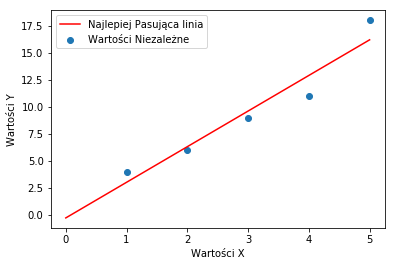

In [8]:
import numpy as np

b = r * (Sy / Sx)
a = My - (b * Mx)
print("b = ", b)
print("a = ", a)

def najlepiej_pasujaca_linia(x):
    return (b * x) + a

x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
plt.plot(x, najlepiej_pasujaca_linia(x), 'r', label='Najlepiej Pasująca linia')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

## Przewidywanie
Super! Obliczyliśmy już naszą najlepiej pasującą linię! Żeby przewidywać wyniki dla dowolnej wartości x, musimy jedynie obliczyć je ze

$$ \hat{y} = bx + a $$

Dodajmy więc nowy element do zbioru X:

$$ X = \left \{  1,2,3,4,5,6 \right \} $$
$$ Y = \left \{  4, 6, 9, 11, 18 \right \} $$

In [9]:
df = df.append({'X': 6, 'Y': np.nan}, ignore_index=True)
df

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,NaN


Teraz musimy obliczyć (przewidzieć) odpowiadającą wartość dla zbioru Y. Zrobimy to tak:

$$ y = 3.3 \times 6 - 0.29 = 19,51 $$

19,51. Oto nasza przewidziana wartość! Napiszmy to jeszcze w Pythonie:

In [10]:
def przewidz_y(x, b, a):
    return b * x + a

df.at[5, 'Y'] = przewidz_y(df['X'][5], b, a)
df

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5


## Ocenianie dokładności modelu
Jak już wiemy jak obiliczyć najlepiej pasującą linię i przewidywać wartości za jej pomocą, chcemy wiedzieć **jak dokładne będą nasze wyniki**. Możemy to określić za pomocą __współczynnika determinacji r kwadrat__ (ang. squared r). 

Oblicza go się ze wzoru:

$$ R^{2} = \frac{SS_{M}}{SS_{T}} = \frac{\sum_{i = 0}^{n} (\hat{y_{i}} - M_{Y})^{2}}{\sum_{i = 0}^{n} (Y_{i} - M_{Y})^{2}} $$

Intuicja potrzebna do zrozumienia tego wzoru przedstawiona jest w tym filmie:


In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="-fgYp74SNtk", width=550, height=300, end=230)

Wróćmy więc do naszego wzoru:

$$ R^{2} = \frac{SS_{M}}{SS_{T}} = \frac{\sum_{i = 0}^{n} (\hat{y_{i}} - M_{Y})^{2}}{\sum_{i = 0}^{n} (Y_{i} - M_{Y})^{2}} $$

Jak już wiesz, **SSm** oznacza sumę kwadratów różnic między przewidywanym wynikiem a średnią wartości zależnych (Y). 
**SSt** analogicznie oznacza sumę kwadratów różnic między znanymi wartościami zależnymi a średnią tych wartości.

Korzystając ze wzoru, obliczmy teraz współczynnik determinacji dla naszego przykładu w Pythonie:

In [12]:
def wsp_determinacji_r_kwadrat(b, a, df, My):
    SSm = 0.00
    SSt = 0.00
    for _, rzad in df.iterrows():
        x = rzad['X']
        y = rzad['Y']
        y_p = przewidz_y(x, b, a)
        SSm += (y_p - My) **2
        SSt += (y - My) ** 2
    return SSm / SSt

R2 = wsp_determinacji_r_kwadrat(b, a, df, My)
print("R2 = ", R2) 

R2 =  0.9614330189117608


## Podsumowanie
Wiedząc to wszystko, możemy napisać w Pythonie funkcję regresji liniowej pozwalającą nam na trenowanie i testowanie naszego modelu:

In [13]:
df = df.append({'X': 20, 'Y': np.nan}, ignore_index=True)
print("Argument: ")
df

Argument: 


,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5
6,20.0,NaN


In [14]:
def RegresjaLiniowa(inp):
    y_dlug = inp.count()['Y']
    out = inp[:]
    inp = inp.dropna()
    
    Mx = srednia(inp['X'])
    My = srednia(inp['Y'])
    
    Sx = odchylenie(inp['X'], Mx)
    Sy = odchylenie(inp['Y'], My)

    n = len(df['X'])
    vr = pd.DataFrame(inp[:])
    vr['y2'] = df['Y'] * df['Y']
    vr['xy'] = df['X'] * df['Y']
    vr['x2'] = df['X'] * df['X']
    vr['y2'] = df['Y'] * df['Y']
    vr.loc['Σ'] = vr.sum()
    r = wsp_korelacji_pearsona(n, vr['X']['Σ'], vr['Y']['Σ'], vr['xy']['Σ'], vr['x2']['Σ'], vr['y2']['Σ'])
    b = r * (Sy / Sx)
    a = My - (b * Mx)
   

    dokl = wsp_determinacji_r_kwadrat(b, a, inp, My)
    
    for i, rzad in out.iterrows():
        if np.isnan(rzad['Y']):
            
            df.at[i, 'Y'] = przewidz_y(rzad['X'], b, a)
    
    return out, dokl

wynik, dokladnosc = RegresjaLiniowa(df)

print("Dokładność = ", dokladnosc)
wynik

Dokładność =  0.9728387171740644


,X,Y
0,1.0,4.00000
1,2.0,6.00000
2,3.0,9.00000
3,4.0,11.00000
4,5.0,18.00000
5,6.0,19.50000
6,20.0,66.11248


Funkcja **RegresjaLiniowa(inp)** przyjmuje 1 argument typu DataFrame, który zawiera kompletną kolumnę X i co najmniej jedną wartość w kolumnie Y. Parametry, które chcemy przewidzieć muszą równać się NaN (ang. Not a Number)

### Źródła
* [Linear Regression - Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
* [Coefficient of determination - Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [Jak obliczyć odchylenie standardowe? - Statystyka Ludzkim Głosem](https://www.youtube.com/watch?v=rLPxu9GoaaQ)
* [Jak obliczyć współczynnik korelacji Pearsona - Statystyka Ludzkim Głosem](https://www.youtube.com/watch?v=2-VEwB8n7Fo)
* [Introduction to Linear Regression - onlinestatbook.com](http://onlinestatbook.com/2/regression/intro.html)
* [Standard Deviation Formulas - Math Is Fun](https://www.mathsisfun.com/data/standard-deviation-formulas.html)
* [Regresja Liniowa - naukowiec.org](http://www.naukowiec.org/wiedza/statystyka/regresja-liniowa_765.html)